In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [11]:
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 9s 0us/step


In [4]:
x_train.shape  # (50000, 32, 32, 3)
x_test.shape   # (10000, 32, 32, 3)
y_train.shape  # (50000, 1)
y_test.shape   # (10000, 1)

(50000, 32, 32, 3)

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

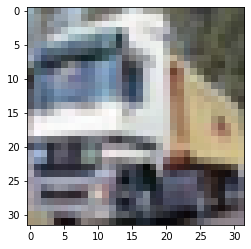

In [13]:
plt.imshow(x_train[1])

Preprocessing

In [16]:
x_train[0].max()

255

In [17]:
x_test[0].max()

255

In [18]:
x_train = x_train / 255
x_test  = x_test  / 255

In [19]:
x_train.max()

1.0

Labels

In [20]:
from keras.utils import to_categorical

In [22]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [24]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Model Building

In [25]:
from keras.models import Sequential

In [26]:
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [27]:
model = Sequential()

# Set of CNN Layers

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

#Max Pooling
model.add(MaxPool2D(pool_size=(2,2)))

# Set of CNN Layers again

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

#Max Pooling
model.add(MaxPool2D(pool_size=(2,2)))


# Flatten
model.add(Flatten())

# Dense Layer
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        32832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [29]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20)

Epoch 1/20
50000/50000 [==============================] - 334s 7ms/step - loss: 1.6034 - accuracy: 0.4184
Epoch 2/20
50000/50000 [==============================] - 118s 2ms/step - loss: 1.1741 - accuracy: 0.5895
Epoch 3/20
50000/50000 [==============================] - 101s 2ms/step - loss: 0.9974 - accuracy: 0.6536
Epoch 4/20
50000/50000 [==============================] - 102s 2ms/step - loss: 0.9017 - accuracy: 0.6890
Epoch 5/20
50000/50000 [==============================] - 102s 2ms/step - loss: 0.8579 - accuracy: 0.7076
Epoch 6/20
50000/50000 [==============================] - 102s 2ms/step - loss: 0.8393 - accuracy: 0.7183
Epoch 7/20
50000/50000 [==============================] - 102s 2ms/step - loss: 0.8285 - accuracy: 0.7210
Epoch 8/20
50000/50000 [==============================] - 102s 2ms/step - loss: 0.8253 - accuracy: 0.7239
Epoch 9/20
50000/50000 [==============================] - 102s 2ms/step - loss: 0.8256 - accuracy: 0.7247
Epoch 10/20
50000/50000 [=====================

In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 35s 3ms/step


[1.2268350698471069, 0.6362000107765198]

In [32]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.68      0.61      1000
           1       0.63      0.90      0.74      1000
           2       0.52      0.52      0.52      1000
           3       0.77      0.15      0.26      1000
           4       0.67      0.62      0.64      1000
           5       0.73      0.49      0.59      1000
           6       0.85      0.61      0.71      1000
           7       0.58      0.79      0.67      1000
           8       0.62      0.84      0.71      1000
           9       0.68      0.77      0.72      1000

   micro avg       0.64      0.64      0.64     10000
   macro avg       0.66      0.64      0.62     10000
weighted avg       0.66      0.64      0.62     10000



In [ ]:
#model.save('larger_CIFAR10_model.h5')